# Comparación de Modelos de Clasificación con dataset de Operadores

In [ ]:
semilla = 28314688

### **Disclaimer: Se recomienda ejecutar los codigos en orden en ue van aparareciendo para evitar posibles errores de librerias o variables que se declaran antes**

## Metodologia

### **Objetivo**

#### El objetivo de esta parte es ver cómo se creó el dataset de los operadores, las decisiones tomadas en esa fase, cómo preprocesamos esos datos para ser usados en los modelos, y comparar los resultados que obtenemos de esos modelos creados para tomar una decisión.

### **Creación de los Datos**

#### El dataset fue creado de manera personalizada, está compuesto por imágenes que representan seis operadores diferentes, cada uno de los cuales fue generado de manera similar al dataset MNIST, es decir tiene las siguientes caracteristicas:

*   Cada imagen tiene una resolución de 28x28 píxeles.

*   El trazo de los operadores es de color blanco, mientras que el fondo es completamente negro, lo que facilita la identificación de las formas.

*   Las imágenes están en escala de grises, lo que significa que cada píxel tiene un valor entre 0 (negro) y 255 (blanco).

*   Se generaron aproximadamente 120 imágenes por cada operador, lo que resulta en un total de alrededor de 720 imágenes en el dataset completo.

*   Las imágenes fueron creadas manualmente mediante herramientas de diseño gráfico. Se prestó especial atención a la diversidad dentro de cada clase, introduciendo variaciones naturales en la forma de los operadores para simular diferentes estilos de escritura o impresión, en otras palabras le colocamos ruido a las imágenes

*  El dataset fue diseñado intencionalmente para emular el formato del dataset MNIST, esto se hizo ademas ya que como MNIST es bastante bueno para los modelos, quisimos copiar estas caracteristicas para tambien llegar a darle el mejor entrenamiento posible a estos datos

*   El dataset fue creado con el objetivo de ser balanceado, es decir, cada clase (operador) tiene el mismo número de muestras, lo que evita sesgos en el entrenamiento del modelo.

#### Básicamente, la creación del dataset giró en torno al dataset de MNIST, intentando copiar sus características, mantener un número uniforme de muestras en cada operador y añadir variedad en las imágenes para que no sean todas iguales y tengan mayor capacidad de generalización.








### **Preprocesamiento de los Datos**

#### **Carga de datos**

##### Cargamos mediante el github donde se encuentran todos los operadores

In [ ]:
!git clone https://github.com/Maxsz20/OperadoresML.git

Cloning into 'OperadoresML'...
remote: Enumerating objects: 644, done.
remote: Counting objects: 100% (644/644), done.
remote: Compressing objects: 100% (634/634), done.
remote: Total 644 (delta 108), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (644/644), 297.10 KiB | 4.72 MiB/s, done.
Resolving deltas: 100% (108/108), done.


Clase 0: 100 muestras
Clase 1: 100 muestras
Clase 2: 100 muestras
Clase 3: 100 muestras
Clase 4: 100 muestras
Clase 5: 100 muestras


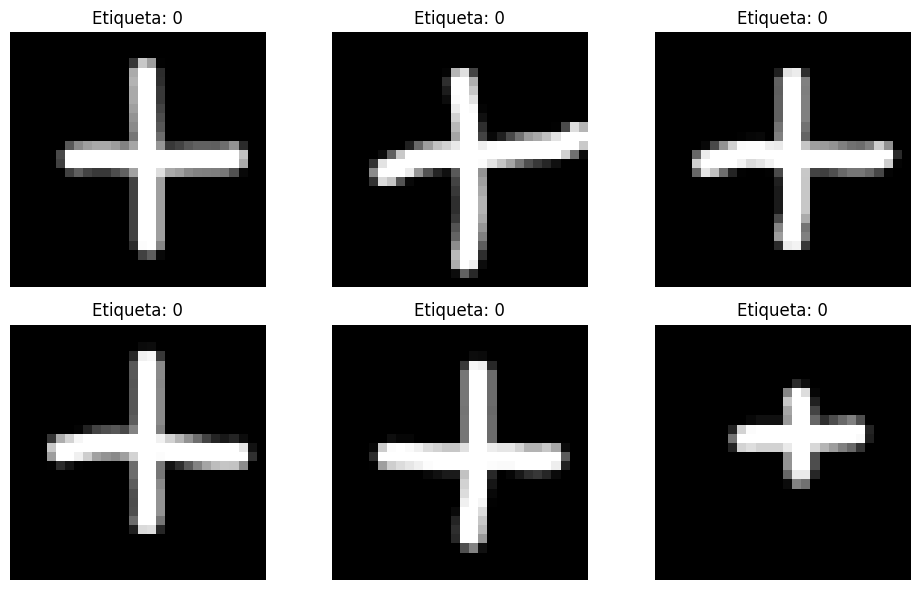

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Función para cargar imágenes y asignar etiquetas
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            img = Image.open(img_path).convert('L') #Escala de grises
            img_array = np.array(img)
            img_array = img_array.astype('float32') / 255  # Normalizar
            img_array = img_array.reshape(28 * 28)  #Convertir a un vector
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Ruta base del repositorio
base_path = "/content/OperadoresML"

# Se asignan las etiquetas respectivas
suma_images, suma_labels = load_images_from_folder(os.path.join(base_path, "Suma"), 0)
resta_images, resta_labels = load_images_from_folder(os.path.join(base_path, "Resta"), 1)
division1_images, division1_labels = load_images_from_folder(os.path.join(base_path, "Division1"), 2)
division2_images, division2_labels = load_images_from_folder(os.path.join(base_path, "Division2"), 3)
multiplicacion1_images, multiplicacion1_labels = load_images_from_folder(os.path.join(base_path, "Multiplicacion1"), 4)
multiplicacion2_images, multiplicacion2_labels = load_images_from_folder(os.path.join(base_path, "Multiplicacion2"), 5)

# Combinar los datos en una sola variable
X = np.concatenate((suma_images, resta_images, division1_images, division2_images, multiplicacion1_images, multiplicacion2_images))
y = np.concatenate((suma_labels, resta_labels, division1_labels, division2_labels, multiplicacion1_labels, multiplicacion2_labels))

# Cantidad de muestras en cada clase
unique_classes, counts = np.unique(y, return_counts=True)

# Mostrar el resultado
for class_label, count in zip(unique_classes, counts):
    print(f"Clase {class_label}: {count} muestras")

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Etiqueta: {y[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

#### **Division del dataset**

##### En este caso, los datos se dividen en datos de entrenamiento y datos de prueba, concretamente en un 70% para entrenamiento y un 30% para prueba. Aunque esta es una decisión arbitraria, las investigaciones indican que es una buena división de los datos.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla, stratify=y)

print(f"- Número de imágenes de entrenamiento: {X_train.shape[0]}")
print(f"- Número de imágenes de prueba: {X_test.shape[0]}")

- Número de imágenes de entrenamiento: 420
- Número de imágenes de prueba: 180


##### Como vemos quedo cantidad de 420 imagenes para usar en el entrenamiento y 180 para usar en la prueba

#### **Transformaciones**

##### Al igual que con MNIST, se aplicaron ciertas transformaciones a los datos para mejorar el rendimiento de los modelos. Como vimos en la parte donde se cargan las imágenes, podemos observar las transformaciones aplicadas.
##### - **Escalado a grises (Escalado a valores correctos de 0 a 255):** Aunque las imágenes las hicimos originalmente en escala de grises para evitar posibles errores, las transformamos en el código a escala de grises. Esto es importante, ya que nos deja solo el rango de 0 a 255 y permite normalizar este rango, además de convertirlas más fácilmente a vectores.
##### - **Normalización (Escalado de valores entre 0 y 1):** Es crucial a la hora de utilizar estos datos en cualquier modelo basado en optimización numérica, como la Regresión Logística y SVM, ya que ayuda al modelo a converger más rápidamente y de manera más estable durante el entrenamiento. Además, evita que características con valores grandes dominen este proceso. En el caso de KNN, ayuda a calcular distancias más precisas, ya que los valores de los píxeles estarán en un mismo rango y no afectarán desproporcionadamente la métrica de distancia.
##### - **Conversión en vectores (Imágenes 28x28 a vector de 784 características):** Un paso importante para entrenar nuestros modelos de Regresión Logística y SVM, ya que esperan que cada instancia de datos sea un vector de características en un espacio multidimensional, no una matriz, como es el caso de las imágenes en el dataset. KNN también trabaja mejor cuando los datos están en un formato vectorizado, ya que la métrica de distancia se calcula entre puntos en un espacio dimensional uniforme.

##### **No ejecutar el siguiente código; únicamente es para observar más de cerca las transformaciones.**

In [ ]:
# Función para cargar imágenes y asignar etiquetas
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            img = Image.open(img_path).convert('L') # Escala de grises
            img_array = np.array(img)
            img_array = img_array.astype('float32') / 255  # Normalizar
            img_array = img_array.reshape(28 * 28)  # Convertir a un vector
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

### Como ya repasamos los modelos y los hiperparámetros en el notebook del MNIST, no incluiremos esta parte aquí. En su lugar, iremos directamente a la creación y evaluación de los modelos usando este dataset de operadores.

## **Construcción y Evaluación**

### Vamos a construir y evaluar cada uno de los modelos, ajustando los hiperparámetros y realizando las modificaciones necesarias para obtener el rendimiento deseado en este conjunto de datos.

### **Regresión logística**

#### Comenzamos aquí con el modelo de regresión logística, validando con la técnica de validación cruzada en k folds. Además, buscamos dentro de un rango de valores de C el mejor de ellos para una buena regularización y determinamos si es mejor usar L1 o L2 en este caso particular. Luego, evaluamos el mejor modelo construido con esos hiperparámetros utilizando las métricas del notebook de MNIST.

#### Empezamos buscando los mejores hiperparámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Hiperparametros a buscar
param_grid = {
    'C': [0.01, 0.04, 0.05, 0.1, 0.5, 0.7, 1, 5, 10],
    'penalty': ['l1', 'l2']
}

model = LogisticRegression(max_iter=1000, random_state=semilla, solver = 'liblinear')

# Aplicamos el GridSearchCV con validacion cruzada
scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro'}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='f1_macro', return_train_score=True)
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_

# Promedios de Accuracy y F1-score en validación
mean_accuracy = results['mean_test_accuracy']
mean_f1 = results['mean_test_f1_macro']

overfitting_penalty = np.abs(results['mean_train_accuracy'] - mean_accuracy)
combined_score = (mean_accuracy + mean_f1) / 2 - overfitting_penalty

# Seleccionamos los mejores hiperparametros
best_index = np.argmax(combined_score)
best_params = results['params'][best_index]

print(f"Mejores hiperparámetros (según Accuracy, F1-score y penalización de sobreajuste): {best_params}")

# Entrenamos el mejor modelo encontrado
svm = grid_search.best_estimator_
predictions = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
test_f1 = f1_score(y_test, predictions, average='macro')

print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")
print(f"F1-score en el conjunto de prueba: {test_f1 * 100:.2f}%")

Mejores hiperparámetros (según Accuracy, F1-score y penalización de sobreajuste): {'C': 0.05, 'penalty': 'l2'}
Precisión en el conjunto de prueba: 90.00%
F1-score en el conjunto de prueba: 89.94%


#### Como vemos los mejores hiperparámetros encontrados para el modelo son C: 0.05 y penalty: 'l2', los cuales fueron seleccionados porque maximizan tanto la precisión (Accuracy) como el F1-score y evitan el sobreasjute. El hiperparámetro C, tiene un valor alto (0.05), lo que indica que se está aplicando una regularización fuerte. Esto ayuda a evitar el sobreajuste al priorizar la simplicidad del modelo, lo cual es especialmente útil porque no tenemos una cantidad muy grande de datos

####  Por otro lado, la penalización 'l2' (regularización Ridge) controla la magnitud de los coeficientes del modelo, evitando que se vuelva demasiado complejo y reduciendo el riesgo de sobreajuste. Esta combinación de hiperparámetros sugiere que el modelo está diseñado para generalizar bien en datos no vistos.

#### Hacemos validación cruzada con esos hiperparámetros y observamos el score tanto de la precisión como del F1 en cada fold.


In [ ]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(C=0.05, penalty='l2', solver='liblinear', max_iter=1000, random_state=semilla)

# Realizamos validacion cruzada
cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')

print(f"Accuracy en validación cruzada (5 folds): {cv_accuracy}")
print(f"F1-score en validación cruzada (5 folds): {cv_f1}")

# Promedios
print(f"Promedio Accuracy: {cv_accuracy.mean() * 100:.2f}%")
print(f"Promedio F1-score: {cv_f1.mean() * 100:.2f}%")

Accuracy en validación cruzada (5 folds): [0.91666667 0.92857143 0.88095238 0.92857143 0.88095238]
F1-score en validación cruzada (5 folds): [0.91698244 0.92870721 0.88212202 0.92912088 0.87980502]
Promedio Accuracy: 90.71%
Promedio F1-score: 90.73%


#### Estos valores indican que el modelo tiene un rendimiento consistente y relativamente estable en los diferentes subconjuntos de datos utilizados durante la validación cruzada, lo cual es una señal positiva de que el modelo está generalizando adecuadamente. El Accuracy promedio del 90.71% sugiere que el modelo clasifica correctamente la mayoría de las muestras, lo cual es un buen indicador de su capacidad predictiva, pero no la mejor de todas. Sin embargo, el F1-score promedio del 90.73% nos da una visión más completa, El hecho de que este score sea ligeramente mayor que el Accuracy indica que, aunque el modelo está clasificando bien la mayoría de las muestras, podría tener dificultades para equilibrar la precisión y el recall en ciertas clases, lo que podría estar afectando su rendimiento en casos específicos.

#### Ahora entrenamos con todos los datos de entrenamiento y vemos la presicion tanto en el conjunto de prueba como del conjunto de entrenamiento

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

predictions_lr = model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions_lr)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

Precisión en el conjunto de entrenamiento: 94.76%
Precisión en el conjunto de prueba: 90.00%


#### Podemos observar que la precisión del modelo en el conjunto de entrenamiento es del 94.76%, mientras que en el conjunto de prueba es del 90.00%. La diferencia entre estas precisiones es pequeña, lo que indica que no existe un sobreajuste significativo en el modelo. Esto es positivo, ya que significa que el modelo está generalizando adecuadamente a datos no vistos, sin memorizar en exceso los datos de entrenamiento y ademas la busqueda de los mejores hiperparametros funciono.
#### Aunque la precisión nos da una idea general del rendimiento del modelo, no nos proporciona información detallada sobre la distribución de los errores. Es decir, no sabemos qué clases o categorías están siendo clasificadas correctamente y cuáles están generando confusión. Para obtener una vista más completa, vamos a implementar otras métricas.

#### La Matriz de confusion y El reporte de clasificacion

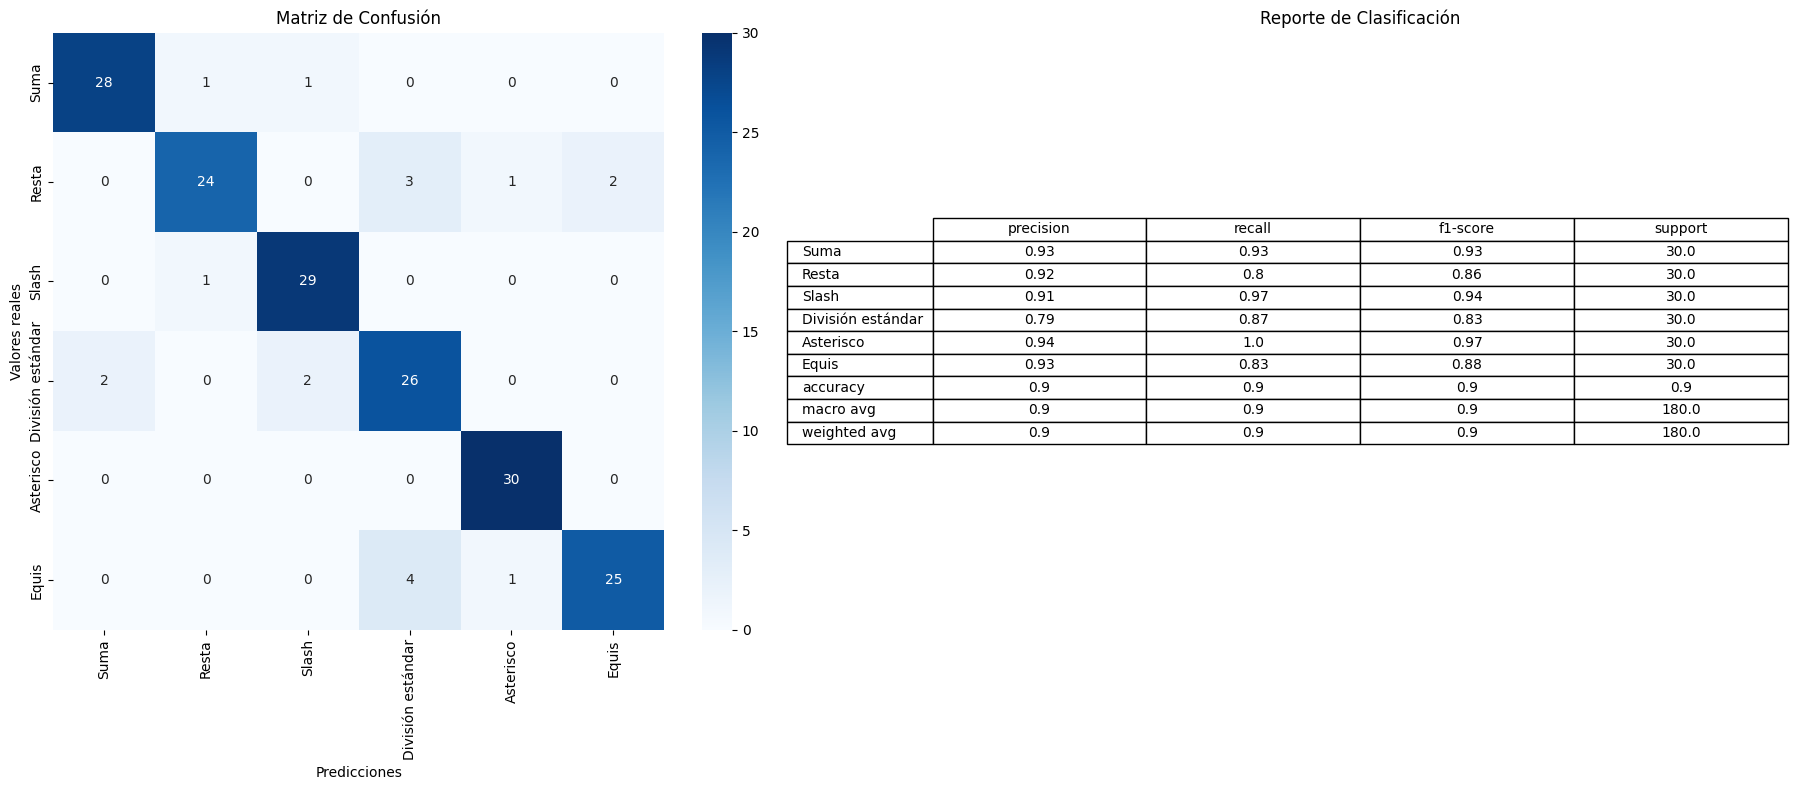

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class_names = ["Suma", "Resta", "Slash", "División estándar", "Asterisco", "Equis"]

y_test_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(18, 8))

# Matriz de confusion
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')

# Reporte de clasificacion
plt.subplot(1, 2, 2)
plt.axis('off')
table = plt.table(cellText=report_df.round(2).values,
                  colLabels=report_df.columns,
                  rowLabels=report_df.index,
                  loc='center',
                  cellLoc='center',
                  colWidths=[0.2] * len(report_df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.4, 1.4)
plt.title('Reporte de Clasificación')

plt.tight_layout()
plt.show()


#### En la matriz de confusión vemos que se acierta en la mayoría de los casos, pero aún así tiene algunas confusiones, sobre todo entre la division estandar y las equis. La resta se confunde con algunos otros operadores, mientras que la suma es la que menos errores tiene.

####Analizando cada categoría, tenemos que Suma tiene un F1-score alto (0.93), lo que sugiere que el modelo logra diferenciarla con claridad. Esto podría deberse a que los símbolos o patrones visuales de esta operación son más distintivos en comparación con las demás. En el caso de División estándar, se observa un comportamiento diferente a los demás, dado que su precisión es la más baja (0.79), aunque su recall es relativamente alto (0.87). Esto implica que el modelo identifica la mayoría de los casos reales de División estándar, pero también tiende a confundir otras operaciones con esta, lo que sugiere cierta ambigüedad en los datos o en las características extraídas.

#### Por otro lado, Slash, Asterisco y Equis presentan valores de F1-score similares (0.94, 0.97 y 0.88, respectivamente), lo que indica que el modelo tiene un rendimiento balanceado en su identificación. Sin embargo, Equis tiene un recall menor (0.83), lo que sugiere que algunos ejemplos de esta categoría no están siendo correctamente identificados, probablemente porque comparten similitudes visuales con otras operaciones.

#### En general, el modelo no muestra un sesgo fuerte hacia una sola categoría, pero sí existen diferencias en precisión y recall que indican que algunas clases son más difíciles de distinguir que otras.

#### Curvas ROC y AUC

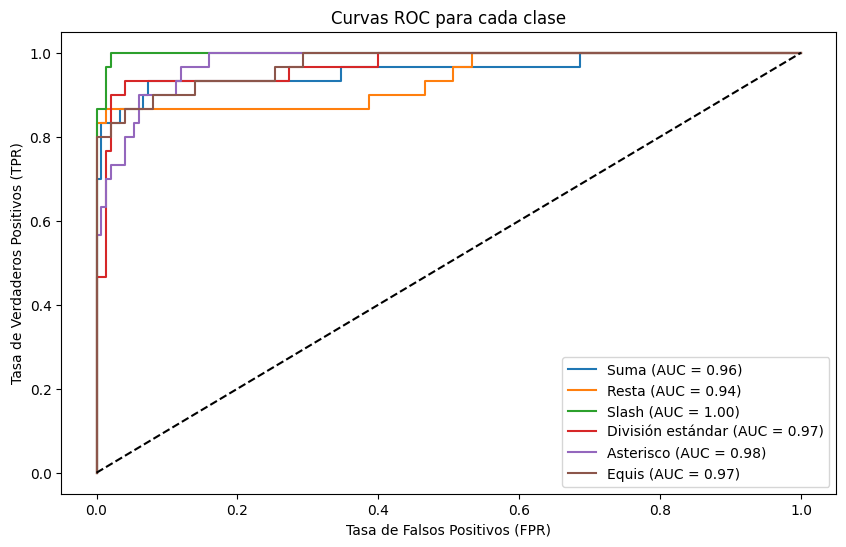

Área bajo la curva ROC (AUC) promedio: 0.9686


In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

class_names = ['Suma', 'Resta', 'Slash', 'División estándar', 'Asterisco', 'Equis']

test_labels_bin = label_binarize(y_test, classes=np.arange(6))
y_score = model.decision_function(X_test)

fpr, tpr, roc_auc = {}, {}, {}

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC para cada clase")
plt.legend(loc="lower right")
plt.show()

macro_roc_auc = roc_auc_score(test_labels_bin, y_score, multi_class="ovr", average="macro")
print(f"Área bajo la curva ROC (AUC) promedio: {macro_roc_auc:.4f}")


#### En este caso, los valores de AUC para las clases son bastante altos: 0.96 para Suma, 0.94 para Resta, 1.00 para Slash, 0.97 para División estándar, 0.98 para Asterisco y 0.97 para Equis, lo que indica que el modelo tiene una excelente capacidad para diferenciar entre las distintas operaciones matemáticas. A pesar de este buen desempeño, las curvas ROC también ayudan a detectar posibles áreas de mejora, como la menor separación entre las clases de Resta y División estándar, que presentan valores de AUC ligeramente más bajos en comparación con otras categorías.

#### Además, las curvas ROC muestran un comportamiento sólido, ya que todas están claramente por encima de la diagonal de referencia, lo que confirma que el modelo supera ampliamente a un clasificador aleatorio. Sin embargo, existen diferencias entre las clases. Slash tiene el AUC más alto (1.00), lo que indica que el modelo identifica esta operación sin errores. Asterisco y División estándar también presentan valores elevados (0.98 y 0.97, respectivamente), reflejando su buena separación del resto de las clases. En contraste, Resta tiene el valor de AUC más bajo (0.94), lo que sugiere que el modelo puede confundir esta operación con otras, especialmente con División estándar, cuyo AUC es similar.

#### Vemos el Log Loss

In [ ]:
from sklearn.metrics import log_loss

probabilities = model.predict_proba(X_test)
loss = log_loss(y_test, probabilities)
print(f"Perdida logarítmica: {loss:.4f}")

Perdida logarítmica: 0.5630


#### El valor de 0.5630 indica que el modelo tiene un rendimiento decente, pero aún hay margen de mejora. Un valor de pérdida logarítmica cercano a 0 es ideal, ya que significa que el modelo está haciendo predicciones correctas con alta confianza. Por otro lado, un valor más alto sugiere que el modelo tiene dificultades para predecir correctamente algunas muestras o que no está lo suficientemente seguro en sus predicciones. Este valor de 0.560 puede estar influenciado por confusiones entre clases, pero aun asi es decente.

#### Se colocan unas predicciones

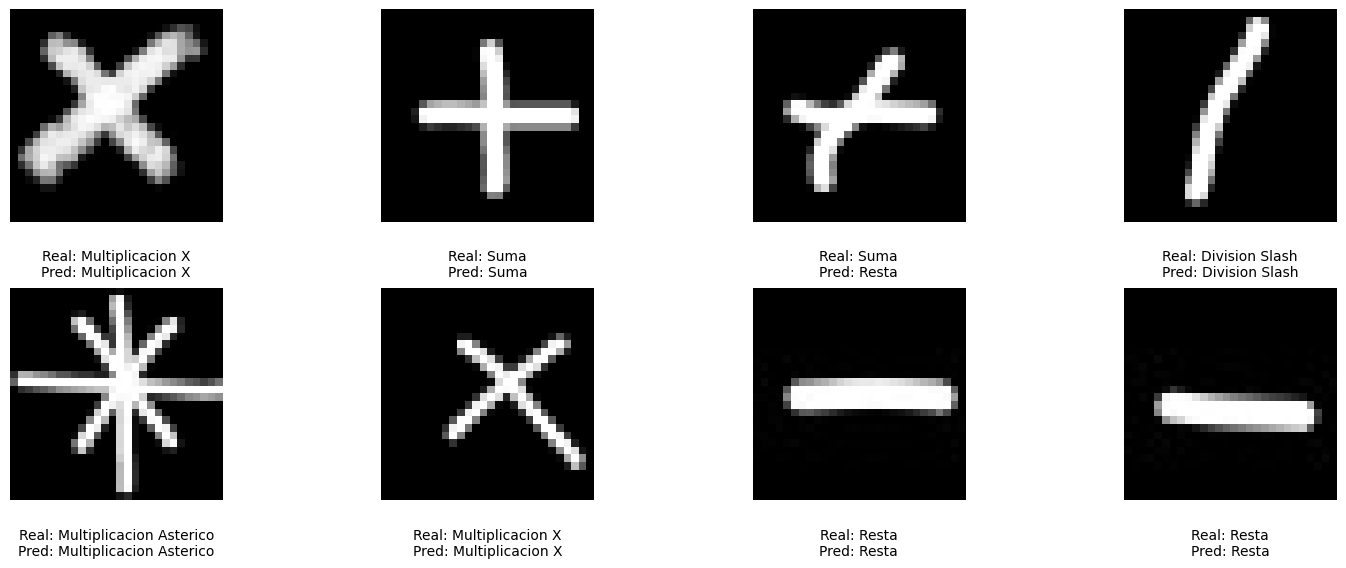

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 8

# Indices
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Predicciones en el conjunto de prueba
predictions = model.predict(X_test)

nombres_clases = {0: "Suma", 1: "Resta", 2: "Division Estandar", 3: "Division Slash",  4: "Multiplicacion Asterico", 5: "Multiplicacion X"}

plt.figure(figsize=(15, 8))

# Se muestra cada imagen con su etiqueta real y predicha
for i, idx in enumerate(sample_indices):
    image = X_test[idx].reshape(28, 28)
    label = nombres_clases[y_test[idx]]  # Etiqueta real
    prediction = nombres_clases[predictions[idx]]  # Etiqueta predicha

    plt.subplot(3, 4, i + 1)
    plt.imshow(image, cmap='gray')

    # Mostrar la etiqueta real y la predicha
    plt.text(0.5, -0.2, f"Real: {label}\nPred: {prediction}",
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

    plt.axis('off')

plt.tight_layout()
plt.show()

### **K-Vecinos**

#### Comenzamos con el modelo de K Vecinos (KNN), validando su rendimiento mediante la técnica de validación cruzada en k folds. Además, buscamos dentro de un rango de valores para el número de vecinos (n_neighbors), el tipo de ponderación (weights) y la métrica de distancia (metric) para determinar la mejor combinación de hiperparámetros que optimice el rendimiento del modelo en el conjunto de prueba y nos permita evitar el sobreajuste. Luego, evaluamos el mejor modelo construido utilizando las métricas de la sección anterior.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

knn = KNeighborsClassifier()

# Rango de hiperparametros
param_grid = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Validacion cruzada con GridSearchCV
scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro'}  # Usar accuracy y f1-score
grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring=scoring,
    refit='f1_macro',
    return_train_score=True  # Aqui habilitamos el cálculo de puntuaciones de entrenamiento
)

# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

# Extraer accuracy y f1-score promedio en validacion cruzada
mean_accuracy = results['mean_test_accuracy']
mean_f1 = results['mean_test_f1_macro']

# Evaluamos el sobreajuste
overfitting_scores = []

for i in range(len(results['params'])):
    # Aqui calculamos la diferencia entre el rendimiento en entrenamiento y prueba
    train_score = results[f'split0_train_accuracy'][i]  # Entrenamiento
    test_score = results[f'split0_test_accuracy'][i]    # Prueba
    overfitting_score = train_score - test_score
    overfitting_scores.append(overfitting_score)

# Combinar ambas métricas y penalizar el sobreajuste
combined_score = (mean_accuracy + mean_f1) / 2 - np.array(overfitting_scores)

best_index = np.argmax(combined_score)
best_params = grid_search.cv_results_['params'][best_index]
print(f"Mejores hiperparámetros (según Accuracy, F1-score y penalización de sobreajuste): {best_params}")

# Evaluamos
knn = grid_search.best_estimator_
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Precisión en el conjunto de prueba: {test_accuracy* 100:.2f}%")
print(f"F1-score en el conjunto de prueba: {test_f1* 100:.2f}%")

Mejores hiperparámetros (según Accuracy, F1-score y penalización de sobreajuste): {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
Precisión en el conjunto de prueba: 93.33%
F1-score en el conjunto de prueba: 93.39%


#### Estos valores resultantes fueron seleccionados después de una búsqueda exhaustiva en donde se consideró no solo el rendimiento del modelo en términos de precisión (accuracy) y F1-score, sino también la penalización por sobreajuste, es decir, la diferencia entre el rendimiento en el conjunto de entrenamiento y el de prueba. Esto asegura que el modelo no solo sea preciso, sino que también generalice bien a datos nuevos. Los valores conseguidos son:

*   Metrica de distancia: euclidean
*   Numero de vecinos (k): 4
*   Peso: Uniforme

#### En el conjunto de prueba, el modelo alcanzó una precisión del 93.33% y un F1-score del 93.39%. Estas métricas indican que el modelo tiene un buen rendimiento general, ya que es capaz de clasificar correctamente la mayoría de las muestras y mantener un equilibrio entre precisión y recall. Ademas su diferencia minima nos ayuda a ver que no tenemos un desajuste con respecto a la clasificacion general, si no que de manera constante clasifica bien las clases.

#### Vamos ahora a evaluarlo haciendo validacion cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', metric='euclidean')

cv_accuracy = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_macro')

print(f"Accuracy en validación cruzada (5 folds): {cv_accuracy}")
print(f"F1-score en validación cruzada (5 folds): {cv_f1}")
print(f"Promedio Accuracy: {cv_accuracy.mean() * 100:.2f}%")
print(f"Promedio F1-score: {cv_f1.mean() * 100:.2f}%")

Accuracy en validación cruzada (5 folds): [0.96428571 0.94047619 0.92857143 0.94047619 0.92857143]
F1-score en validación cruzada (5 folds): [0.96487762 0.94108907 0.92797467 0.94209571 0.92887689]
Promedio Accuracy: 94.05%
Promedio F1-score: 94.10%


#### Los resultados de esta validación cruzada muestran un rendimiento consistente, aunque no mucha pero con cierta variabilidad entre los diferentes folds . En este caso, se utilizó una validación cruzada de 5 folds, lo que significa que el conjunto de entrenamiento se dividió en 5 partes, y el modelo se entrenó y evaluó 5 veces, utilizando cada vez una parte diferente como conjunto de validación y el resto como conjunto de entrenamiento.
#### El hecho de que los promedios de Accuracy y F1-score estén alrededor del 94% sugiere que el modelo es capaz de clasificar correctamente la mayoría de las muestras.

#### Entrenamos de forma completa y sacamos las presiciones tanto de prueba como de entrenamiento

In [ ]:
# Entrenar el modelo
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

predictions_knn = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions_knn)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

Precisión en el conjunto de entrenamiento: 95.71%
Precisión en el conjunto de prueba: 91.67%


#### Como podemos observar aquí, la diferencia de precisión entre los dos conjuntos no es significativa. Gracias a encontrar los mejores hiperparámetros, logramos no solo alcanzar un nivel de precisión muy bueno, sino también evitar el sobreajuste que podría haber sido provocado por otros valores si no los hubiéramos tenido en cuenta. En cuanto a los valores en sí, son bastante altos para el conjunto de datos que tenemos. Al analizar las otras métricas, podemos obtener una mejor idea de qué tan bueno es realmente el modelo, y podriamos afirmar que estas precisiones no son engañosas.


#### Matriz de confusion y Reporte

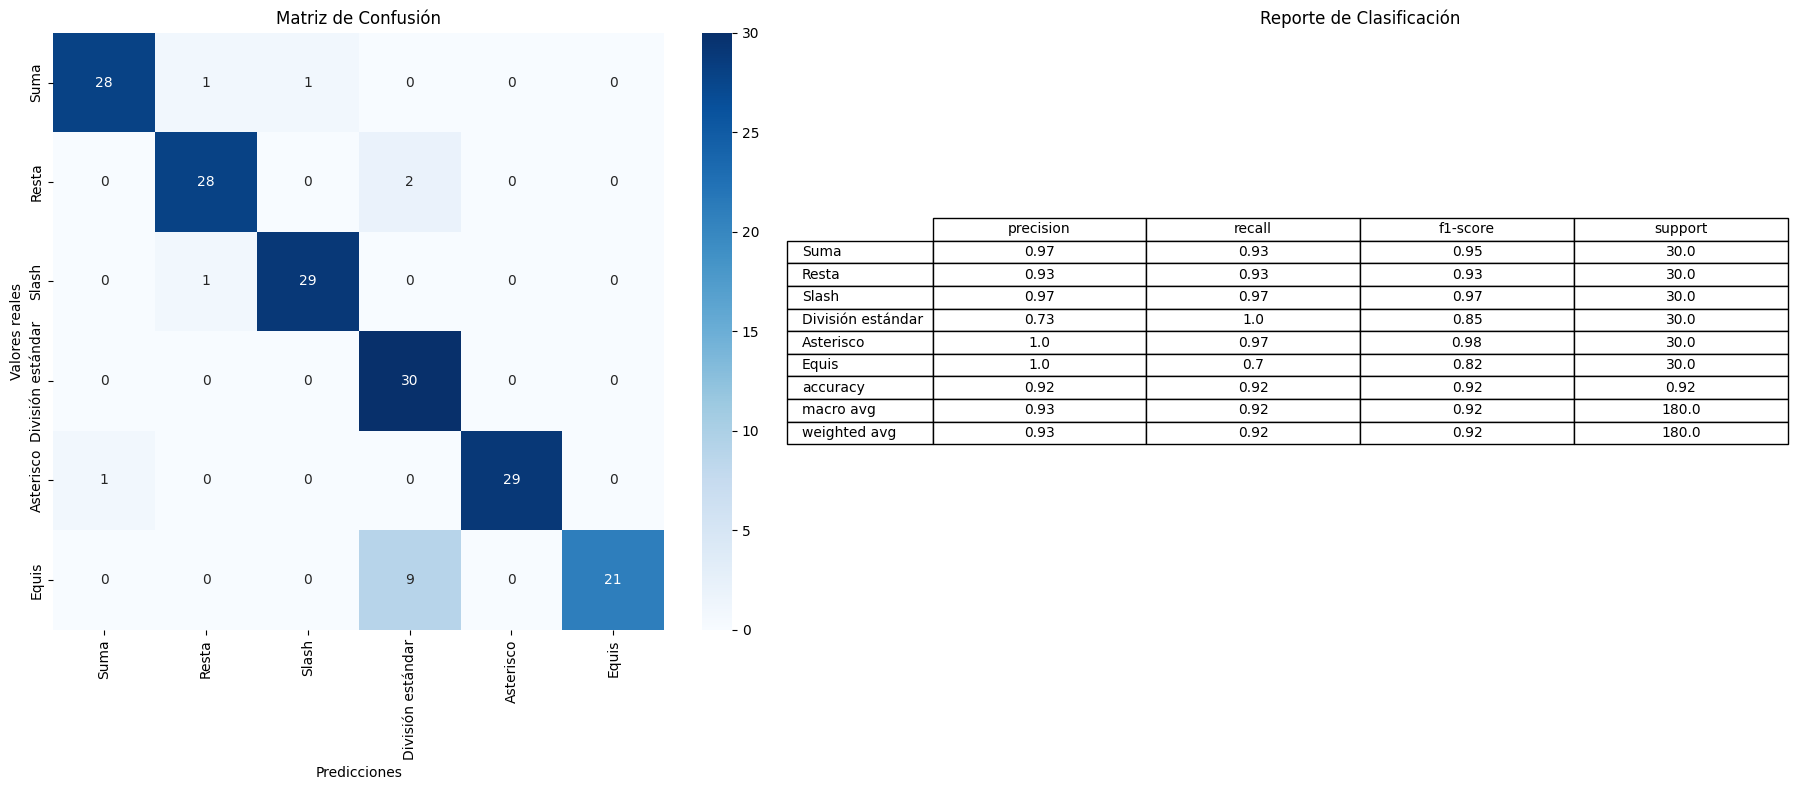

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class_names = ["Suma", "Resta", "Slash", "División estándar", "Asterisco", "Equis"]

y_test_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(18, 8))

# Matriz de confusion
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')

# Reporte de clasificacion
plt.subplot(1, 2, 2)
plt.axis('off')
table = plt.table(cellText=report_df.round(2).values,
                  colLabels=report_df.columns,
                  rowLabels=report_df.index,
                  loc='center',
                  cellLoc='center',
                  colWidths=[0.2] * len(report_df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.4, 1.4)
plt.title('Reporte de Clasificación')

plt.tight_layout()
plt.show()


#### Como vemos en la matriz de confusión tenemos visión detallada de cómo el modelo está clasificando cada una de las categorías y dónde están ocurriendo los errores. En este caso, podemos notar que la diagonal principal tiene los valores más altos, lo cual es positivo porque significa que la mayoría de las predicciones son correctas. Sin embargo, hay ciertos errores de clasificación que destacan. Por ejemplo, los que ocurren división estandar.
#### Por otro lado, vamos a desglosar el reporte

* División estándar tiene la precisión más baja con 0.73 y un recall de 1.0, lo que significa que el modelo es muy efectivo identificando ejemplos reales de esta clase, pero también tiende a confundir otras operaciones con División estándar, generando falsos positivos.
* Suma tiene una precisión de 0.97 y un recall de 0.93, lo que indica que el modelo clasifica correctamente la mayoría de los ejemplos de esta clase, aunque algunos pueden estar siendo confundidos con otras operaciones.
* Resta muestra un balance entre precisión y recall, ambos con 0.93, lo que sugiere que el modelo es confiable al clasificar esta operación, aunque aún puede presentar algunos errores al diferenciarla de otras.
* Slash tiene una precisión y recall de 0.97, lo que indica un excelente rendimiento del modelo para identificar esta operación con muy pocos errores.
* Asterisco alcanza la precisión más alta (1.0) y un recall de 0.97, lo que significa que prácticamente todas sus predicciones son correctas, aunque algunos ejemplos de Asterisco pueden ser clasificados erróneamente en otras categorías.
* Equis también tiene una precisión perfecta de 1.0, pero su recall es 0.7, lo que indica que aunque las predicciones de esta clase son muy confiables, el modelo tiene dificultades para detectar correctamente todos los ejemplos de Equis, clasificando algunos en otras categorías.

#### En general, el modelo tiene un accuracy de 0.92, lo que indica un buen desempeño en la clasificación de las operaciones matemáticas, aunque algunas clases como División estándar y Equis podrían beneficiarse de un ajuste para mejorar su precisión y recall.

#### Curvas ROC y AUC

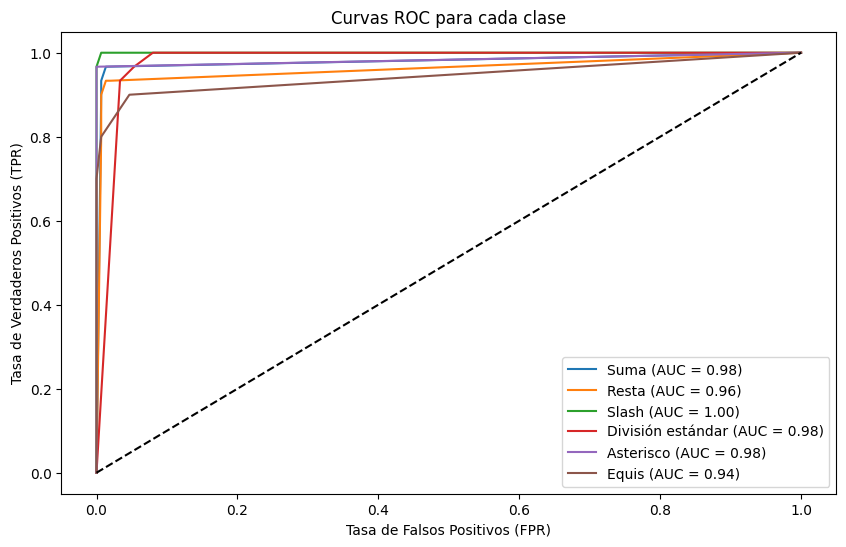

Área bajo la curva ROC (AUC) promedio: 0.9751


In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

class_names = ['Suma', 'Resta', 'Slash', 'División estándar', 'Asterisco', 'Equis']

test_labels_bin = label_binarize(y_test, classes=np.arange(6))
y_score = knn.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC para cada clase")
plt.legend(loc="lower right")
plt.show()

macro_roc_auc = roc_auc_score(test_labels_bin, y_score, multi_class="ovr", average="macro")
print(f"Área bajo la curva ROC (AUC) promedio: {macro_roc_auc:.4f}")


#### Como podemos observar en las curvas ROC, las cuatro se encuentran en la posición que buscamos, es decir, cerca del vértice superior izquierdo. Además, al analizar sus AUC, vemos que, dado cualquier umbral de decisión, las clases se clasifican bastante bien, con valores entre 0.94 y 1.00. La equis presenta el valor más bajo, mientras que el Slash tiene el valor más altoa. Estas curvas ROC y valores de AUC nos proporcionan una mejor idea sobre la clasificación de las clases, y podemos concluir que es bastante buena.

#### Algunas predicciones

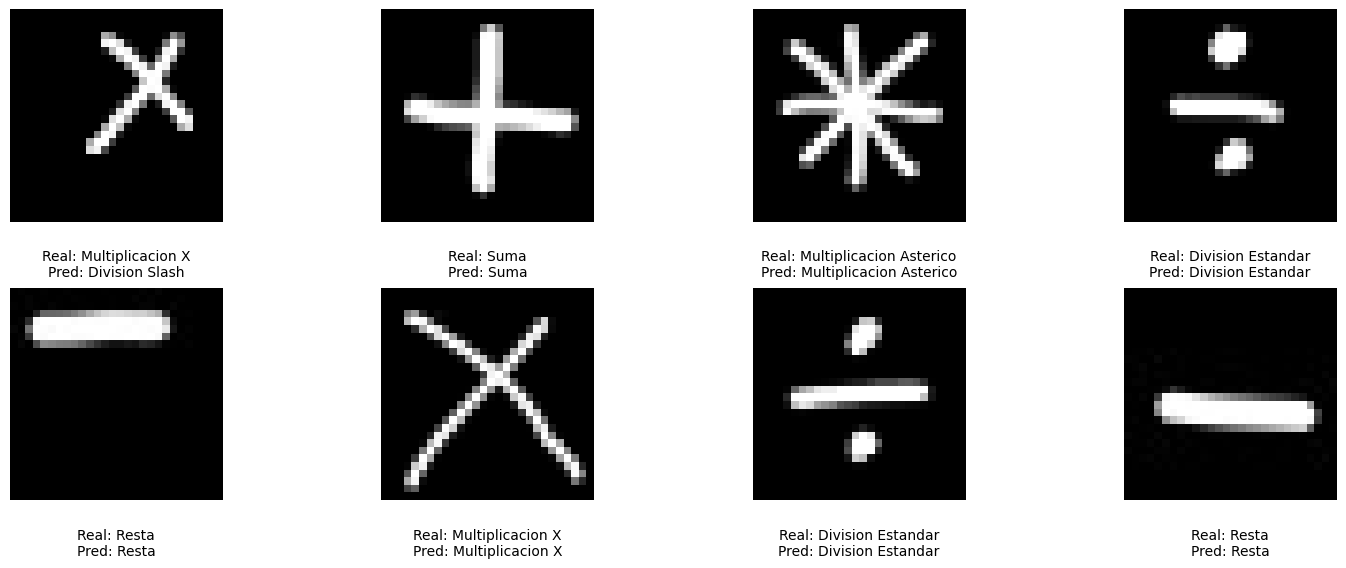

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 8

# Indices
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Predicciones en el conjunto de prueba
predictions = knn.predict(X_test)

nombres_clases = {0: "Suma", 1: "Resta", 2: "Division Estandar", 3: "Division Slash",  4: "Multiplicacion Asterico", 5: "Multiplicacion X"}

plt.figure(figsize=(15, 8))

# Se muestra cada imagen con su etiqueta real y predicha
for i, idx in enumerate(sample_indices):
    image = X_test[idx].reshape(28, 28)
    label = nombres_clases[y_test[idx]]  # Etiqueta real
    prediction = nombres_clases[predictions[idx]]  # Etiqueta predicha

    plt.subplot(3, 4, i + 1)
    plt.imshow(image, cmap='gray')

    # Mostrar la etiqueta real y la predicha
    plt.text(0.5, -0.2, f"Real: {label}\nPred: {prediction}",
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

    plt.axis('off')

plt.tight_layout()
plt.show()

### **SVM**

#### Para conseguir los mejores hiperparametros

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Definimos los hiperparámetros a buscar
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.05, 0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 5.5, 6, 7, 7.5, 8, 8.5, 10, 15, 20],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

svm = SVC()

scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro'}

grid_search = GridSearchCV( estimator=svm, param_grid=param_grid, scoring=scoring, refit='f1_macro', cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
results = grid_search.cv_results_

# Promedios de Accuracy y F1-score
mean_accuracy = results['mean_test_accuracy']
mean_f1 = results['mean_test_f1_macro']

# Sobreajuste
overfitting_penalty = np.abs(results['mean_train_accuracy'] - mean_accuracy)

# Combinamos las métricas
combined_score = (mean_accuracy + mean_f1) / 2 - overfitting_penalty

# Mejores hiperparametros
best_index = np.argmax(combined_score)
best_params = results['params'][best_index]

print(f"Mejores hiperparámetros (según Accuracy, F1-score y penalización de sobreajuste): {best_params}")

# Entrenamos el mejor modelo encontrado
svm = grid_search.best_estimator_
predictions = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
test_f1 = f1_score(y_test, predictions, average='macro')

print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")
print(f"F1-score en el conjunto de prueba: {test_f1 * 100:.2f}%")


Mejores hiperparámetros (según Accuracy, F1-score y penalización de sobreajuste): {'C': 5, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Precisión en el conjunto de prueba: 93.89%
F1-score en el conjunto de prueba: 93.99%


#### Estos valores fueron seleccionados tras una búsqueda exhaustiva en la que se consideró no solo el rendimiento del modelo en términos de precisión (accuracy) y F1-score, sino también la penalización por sobreajuste. Esto significa que se evaluó la diferencia entre el rendimiento en el conjunto de entrenamiento y el de prueba para garantizar que el modelo no solo tenga alta precisión, sino que también generalice bien a datos nuevos, evitandose asi un posible sobreasjute en entrenamiento.
#### Vemos tambien en la evaluación con el conjunto de prueba, el modelo alcanzó una precisión del 93.84% y un F1-score del 93.99%. Estos resultados indican un buen equilibrio entre precisión y recall, lo que sugiere que el modelo clasifica correctamente la mayoría de las muestras sin favorecer excesivamente una clase sobre otra. Además, el uso del kernel poly con un valor de C = 5 gamma = 'scale' y un degree =  2, nos dice que el modelo es capaz de capturar patrones complejos sin caer en un sobreajuste excesivo.

#### Ahora con estos valores haremos mas validaciones, entrenaremos y analizaremos las metricas para ver el rendimiento general del modelo.

#### Hacemos validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm = SVC(kernel='poly', C=5, gamma='scale', degree=2, random_state=semilla, probability=True)

cv_accuracy = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

cv_f1 = cross_val_score(svm, X_train, y_train, cv=5, scoring='f1_macro')

print(f"Accuracy en validación cruzada (5 folds): {cv_accuracy}")
print(f"F1-score en validación cruzada (5 bfolds): {cv_f1}")
print(f"Promedio Accuracy: {cv_accuracy.mean() * 100:.2f}%")
print(f"Promedio F1-score: {cv_f1.mean() * 100:.2f}%")

Accuracy en validación cruzada (5 folds): [0.97619048 0.96428571 0.95238095 0.97619048 0.92857143]
F1-score en validación cruzada (5 bfolds): [0.97654321 0.96414841 0.95299383 0.97616007 0.92887689]
Promedio Accuracy: 95.95%
Promedio F1-score: 95.97%


#### El promedio de precisión (accuracy) es del 95.95%, lo que indica que el modelo clasifica correctamente la mayoría de las muestras. Los valores individuales en cada fold varían entre 97% y 92%, lo que indica que el desempeño es relativamente consistente en distintas particiones de los datos. El F1-score promedio es del 95.97%, mostrando un buen equilibrio entre precisión y recall. La distribución de los valores en cada fold es bastante similar, con variaciones pero ninguna que sea alarmante, lo que indica que el modelo mantiene un rendimiento equilibrado en diferentes subconjuntos del dataset. Por lo tanto vemos que tenemos en el modelo una capacidad aceptable para generalizar a datos nuevos.

#### Entrenando y evaluando de forma completa el dataset

In [ ]:
# Entrenar el modelo
svm.fit(X_train, y_train)
y_train_pred = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

predictions_svm = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions_svm)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

Precisión en el conjunto de entrenamiento: 99.52%
Precisión en el conjunto de prueba: 93.89%


#### Con estos resultados vemos el desempeño general del modelo cuando se entrena con todo el conjunto de entrenamiento de forma regular. La precisión en el conjunto de entrenamiento es del 99.52%, lo que indica que el modelo aprende bien los patrones presentes en los datos con los que fue entrenado, pero sin crear una memorizacion a estos datos.Por otro lado, la precisión en el conjunto de prueba es del 93.89%, un valor ligeramente menor pero bastante cercano. Esto es una buena señal, ya que sugiere que el modelo no está sobreasjustado de forma alarmante a los datos de entrenamiento, sino que logra adaptarse bien a nuevos datos no vistos.









#### Matriz de confusion y Reporte

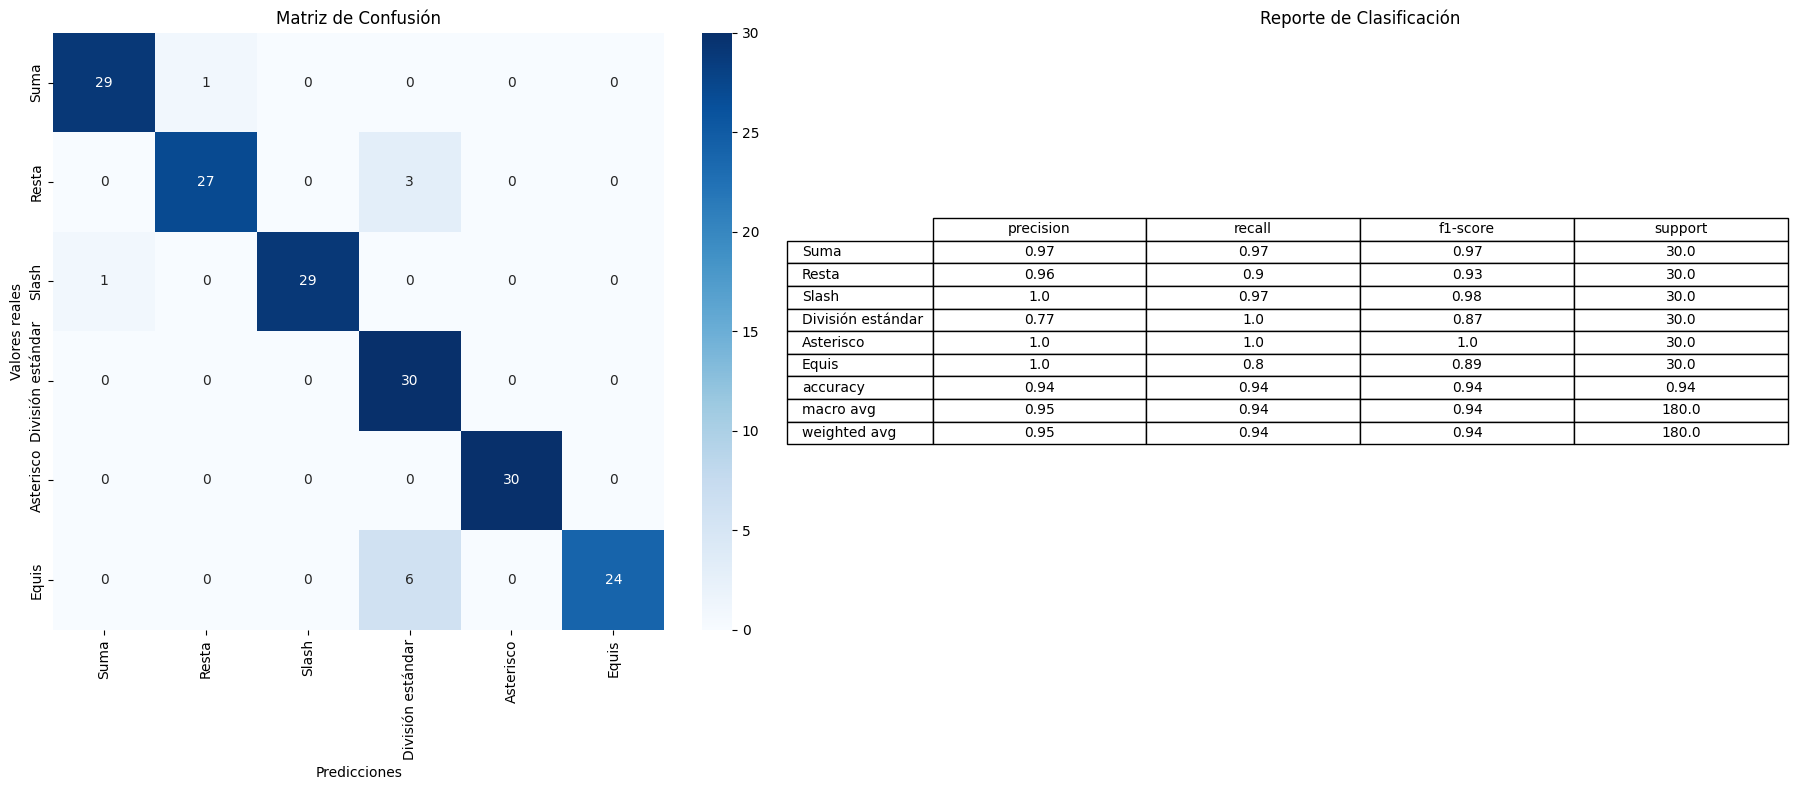

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class_names = ["Suma", "Resta", "Slash", "División estándar", "Asterisco", "Equis"]

y_test_pred = svm.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(18, 8))

# Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')

# Reporte de clasificación
plt.subplot(1, 2, 2)
plt.axis('off')
table = plt.table(cellText=report_df.round(2).values,
                  colLabels=report_df.columns,
                  rowLabels=report_df.index,
                  loc='center',
                  cellLoc='center',
                  colWidths=[0.2] * len(report_df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.4, 1.4)
plt.title('Reporte de Clasificación')

plt.tight_layout()
plt.show()


#### En la matriz de confusión podemos ver que los mayores problemas al clasificar se dan en la division estandar. Es decir, muchos símbolos de división son tomados como si fueran otros simbolos, lo mas probable es que estos simbolos sean los que mas ruido puedan tener y ademas debido a la regularización aplicada, que aunque es poca, tiene cierto impacto.
#### La precisión (accuracy) es alta en general en cada clase, excepto como ya vimos en el matriz de confusion en la division estandar, con valores que van desde 0.77 hasta 1.0, lo que significa que cuando el modelo predice una determinada operación, suele estar en lo correcto. Tambien, hay una variabilidad en el recall, especialmente en la clase equis, donde el valor es 0.8, indicando que el modelo está perdiendo algunas instancias de esta categoría. En contraste, la division estandar y el asterisco tienen un recall de 1.00, lo que significa que el modelo reconoce correctamente la gran mayoria de los ejemplos de esta clase.
#### El F1-score, que equilibra precisión y recall, también es consistente en la mayoría de los casos, con un promedio ponderado de 0.95. Esto indica que el modelo mantiene un buen balance general. Sin embargo, la menor puntuación en resta sugiere que podría haber un desbalance en los datos o que esta operación es más difícil de distinguir en comparación con las demás. En términos generales, estas metricas nos dicen que el modelo se esta comportando muy bien ante estos datos.



#### Curvas ROC y AUC

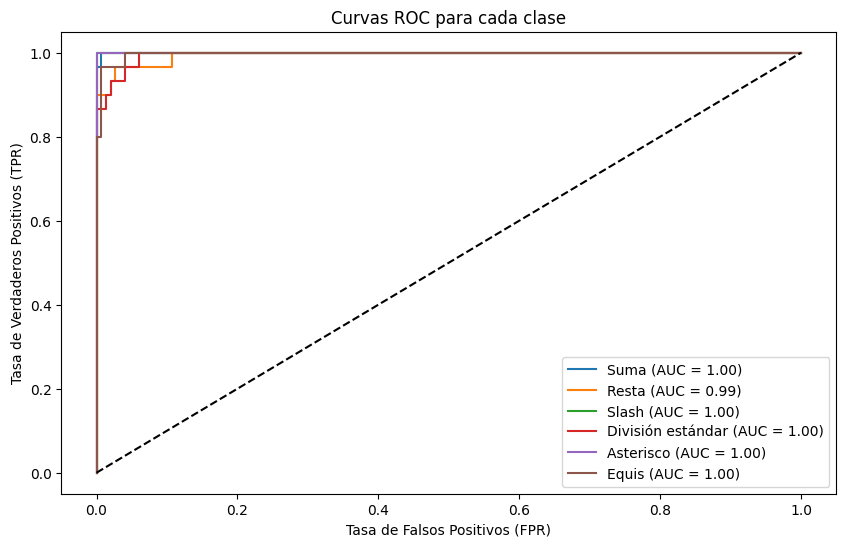

Área bajo la curva ROC (AUC) promedio: 0.9980


In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

class_names = ['Suma', 'Resta', 'Slash', 'División estándar', 'Asterisco', 'Equis']

test_labels_bin = label_binarize(y_test, classes=np.arange(6))
y_score = svm.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC para cada clase")
plt.legend(loc="lower right")
plt.show()

macro_roc_auc = roc_auc_score(test_labels_bin, y_score, multi_class="ovr", average="macro")
print(f"Área bajo la curva ROC (AUC) promedio: {macro_roc_auc:.4f}")


#### En este caso, los valores de AUC para las clases son bastante altos: 0.99 para Resta , y 1.00 par las demas clases, lo que indica que el modelo tiene una excelente capacidad para diferenciar entre las distintas operaciones matemáticas en cualquier umbral de desicion. Ademas, el comportamiento de las curvas ROC refleja que el comportamiento es bastante bueno, dando esa curva que simpre buscamos en los modelos.
#### Si analizamos un poco más las curvas ROC, vemos que están en la posición deseada, es decir, en o muy cerca del 1 y muy alejadas de la línea diagonal de referencia.

#### Algunas predicciones

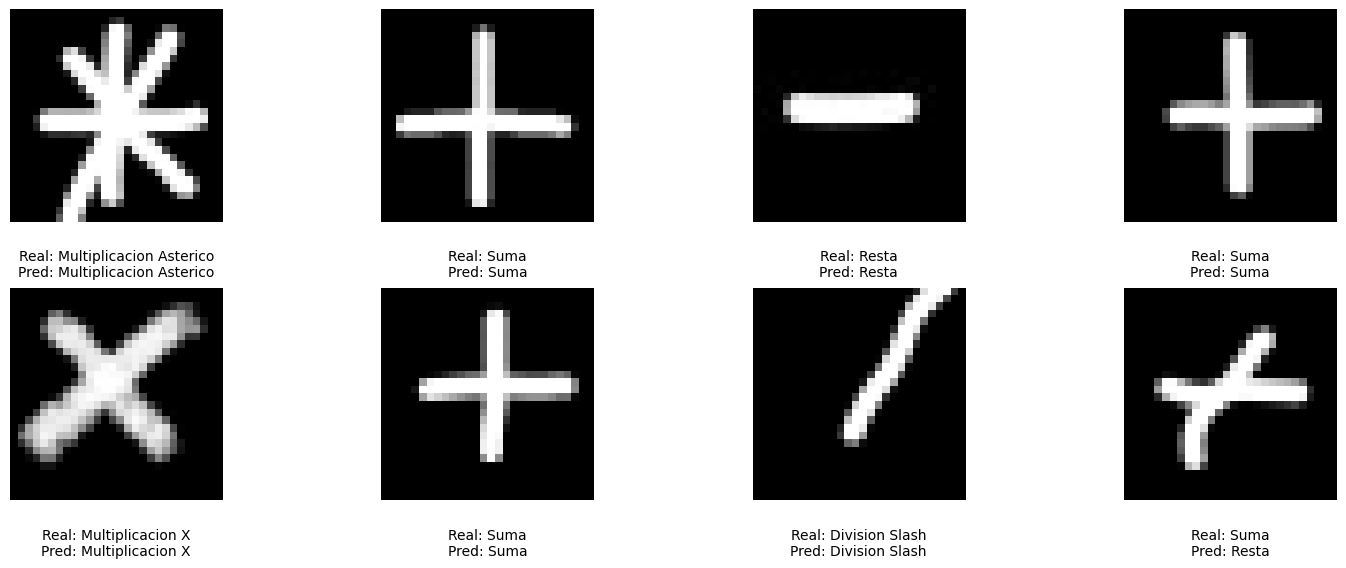

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 8 # Numero de muestras

# Indices
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Predicciones en el conjunto de prueba
predictions = svm.predict(X_test)

nombres_clases = {0: "Suma", 1: "Resta", 2: "Division Estandar", 3: "Division Slash",  4: "Multiplicacion Asterico", 5: "Multiplicacion X"}

plt.figure(figsize=(15, 8))

# Se muestra cada imagen con su etiqueta real y predicha
for i, idx in enumerate(sample_indices):
    image = X_test[idx].reshape(28, 28)
    label = nombres_clases[y_test[idx]]  # Etiqueta real
    prediction = nombres_clases[predictions[idx]]  # Etiqueta predicha

    # Crear un subplot para cada imagen
    plt.subplot(3, 4, i + 1)
    plt.imshow(image, cmap='gray')

    # Mostrar la etiqueta real y la predicha
    plt.text(0.5, -0.2, f"Real: {label}\nPred: {prediction}",
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

    plt.axis('off')

plt.tight_layout()
plt.show()

## **Comparación de Resultados y Decisión**

### Una vez terminada toda la construcción y evaluación de los modelos, podemos empezar a comparar los resultados y decidir cuál es el que vamos a escoger para usar en nuestra aplicación interactiva.

### **Analisis de resultados**

#### Vamos a mostrar una comparación entre los tres modelos, revisando sus matrices de confusión, métricas importantes, Curvas ROC y AUC, para decidir cuál será el modelo a usar en nuestra aplicación.

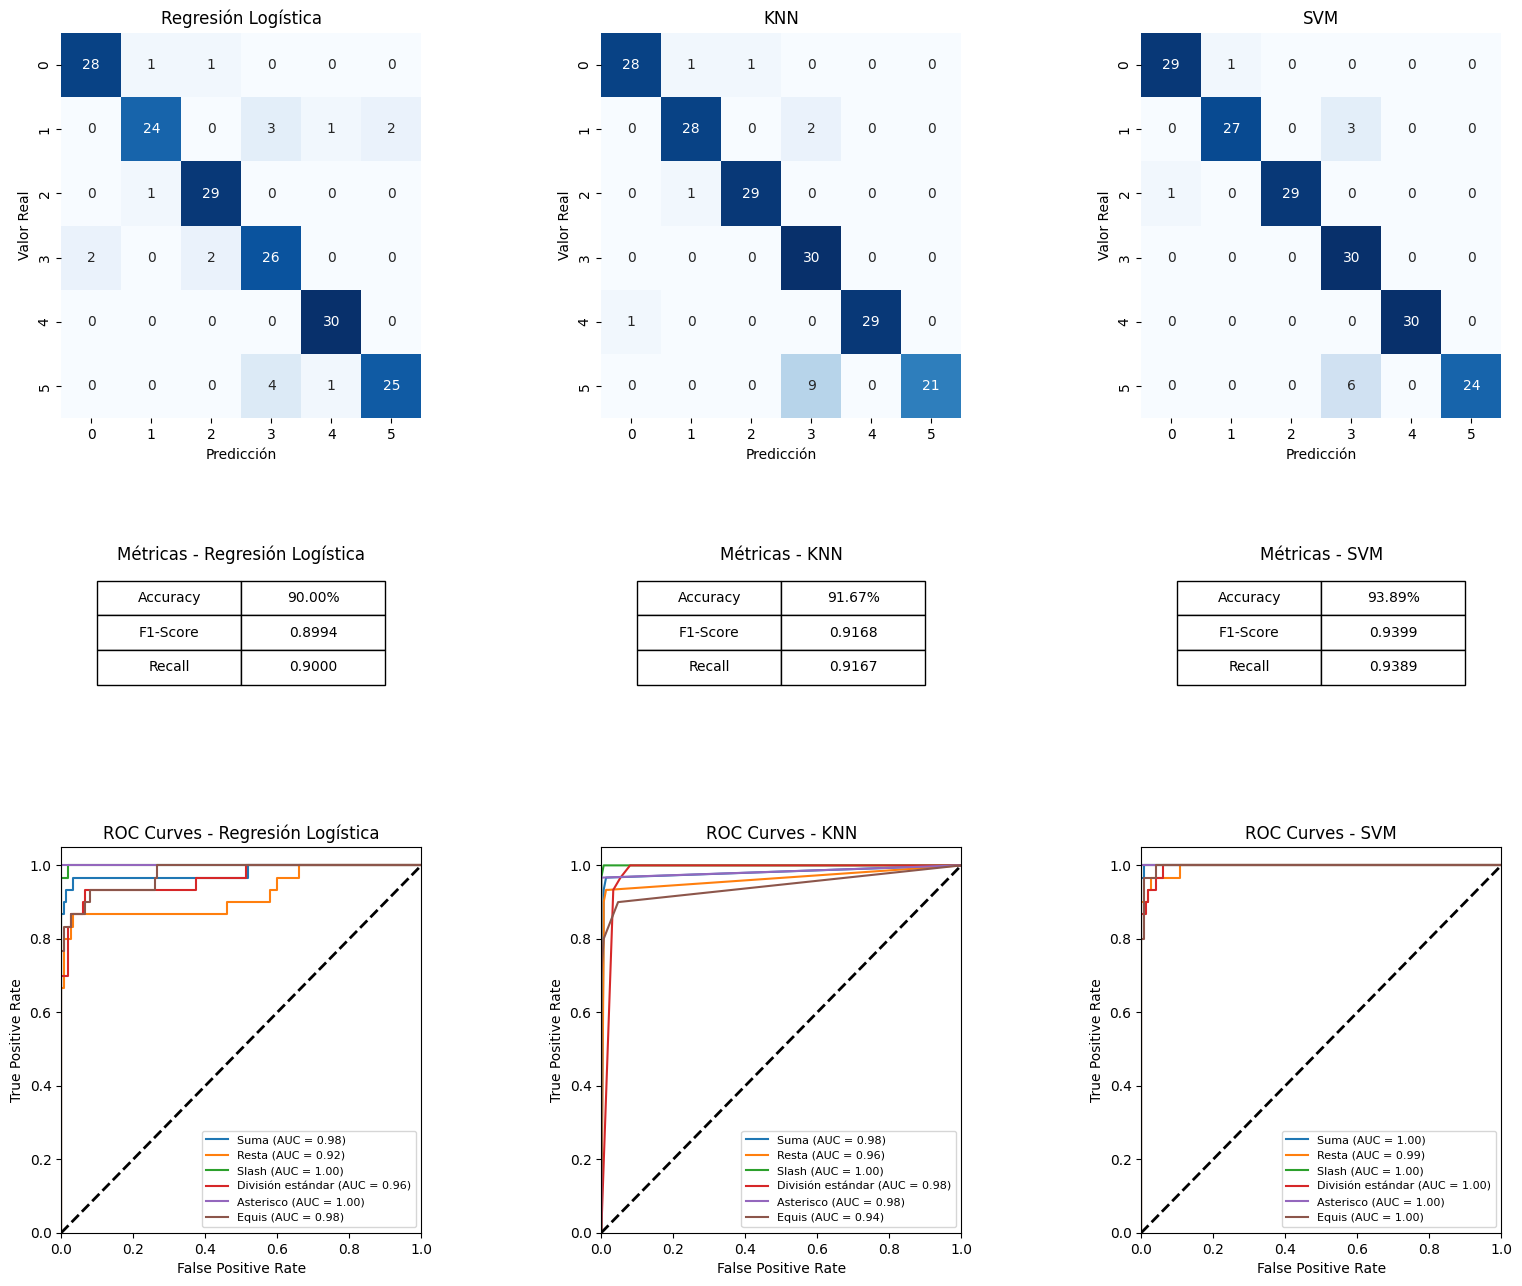

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Precisión (Accuracy)
accuracy_lr = accuracy_score(y_test, predictions_lr)
accuracy_knn = accuracy_score(y_test, predictions_knn)
accuracy_svm = accuracy_score(y_test, predictions_svm)

# Se calculan las métricas para cada modelo
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)
    return {
        'Modelo': model_name,
        'Accuracy': f"{accuracy * 100:.2f}%",
        'F1-Score': f"{f1:.4f}",
        'Recall': f"{recall:.4f}",
        'Matriz de Confusión': cm
    }

# Binarizar las etiquetas para multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]


# Obtener las probabilidades de predicción para cada modelo
# Asumiendo que tienes predict_proba para cada modelo
y_pred_prob_lr = model.predict_proba(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)

# Métricas para los tres modelos
metrics_lr = calculate_metrics(y_test, predictions_lr, 'Regresión Logística')
metrics_knn = calculate_metrics(y_test, predictions_knn, 'KNN')
metrics_svm = calculate_metrics(y_test, predictions_svm, 'SVM')

# Crear una figura para las matrices de confusión, las métricas y las curvas ROC
fig = plt.figure(figsize=(18, 15))  # Aumentar el tamaño de la figura
gs = gridspec.GridSpec(3, 3, height_ratios=[3, 1, 3], wspace=0.5, hspace=0.5)  # 3 filas, 3 columnas

# Matrices de confusion
def plot_confusion_matrix(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, annot_kws={"size": 10})
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Predicción', fontsize=10)
    ax.set_ylabel('Valor Real', fontsize=10)

# Cuadro de las metricas
def plot_metrics(ax, metrics, title):
    ax.axis('off')  # Ocultar ejes
    table_data = [
        ["Accuracy", metrics['Accuracy']],
        ["F1-Score", metrics['F1-Score']],
        ["Recall", metrics['Recall']]
    ]
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.4, 0.4])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    ax.set_title(title, fontsize=12)

# Función para calcular y graficar la curva ROC y el AUC
def plot_roc_auc(ax, y_true, y_pred_prob, model_name):
    class_names = ['Suma', 'Resta', 'Slash', 'División estándar', 'Asterisco', 'Equis']
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    ax.set_title(f'ROC Curves - {model_name}', fontsize=12)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.legend(loc="lower right", fontsize=8)

# Graficar las matrices de confusión
ax1 = plt.subplot(gs[0, 0])
plot_confusion_matrix(ax1, metrics_lr['Matriz de Confusión'], "Regresión Logística")

ax2 = plt.subplot(gs[0, 1])
plot_confusion_matrix(ax2, metrics_knn['Matriz de Confusión'], "KNN")

ax3 = plt.subplot(gs[0, 2])
plot_confusion_matrix(ax3, metrics_svm['Matriz de Confusión'], "SVM")

# Graficar las métricas
ax4 = plt.subplot(gs[1, 0])
plot_metrics(ax4, metrics_lr, "Métricas - Regresión Logística")

ax5 = plt.subplot(gs[1, 1])
plot_metrics(ax5, metrics_knn, "Métricas - KNN")

ax6 = plt.subplot(gs[1, 2])
plot_metrics(ax6, metrics_svm, "Métricas - SVM")

# Graficar las curvas ROC
ax7 = plt.subplot(gs[2, 0])
plot_roc_auc(ax7, y_test_bin, y_pred_prob_lr, "Regresión Logística")

ax8 = plt.subplot(gs[2, 1])
plot_roc_auc(ax8, y_test_bin, y_pred_prob_knn, "KNN")

ax9 = plt.subplot(gs[2, 2])
plot_roc_auc(ax9, y_test_bin, y_pred_prob_svm, "SVM")

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5, hspace=0.5)
plt.show()

#### Vamos a analizar punto por punto esta comparación de resultados:

##### **Análisis de Precisión (Accuracy):** La Regresión Logística es la menos precisa de las tres, con un 93.33% de aciertos. Aunque es un modelo relativamente simple, tiene dificultades con algunos operadores más complejos o con mas ruido, lo que se refleja en los errores de la matriz de confusión. KNN y SVM tienen buena precisión, pero con SVM ligeramente mejor. lo que convierte en este modelo el mejore en términos de clasificación correcta de los operadores.

##### **Análisis de F1-Score y Recall**: Aquí vemos la misma tendencia que con la precisión: SVM y KNN tienen los mejores valores, con SVM ligeramente mejor. La Regresión Logística queda un poco rezagada, lo que indica que no solo tiene menor precisión, sino que también pierde más instancias correctas. Quedando SVM como el que presentan mejores valores en estas 2 metricas.

##### **Análisis de la Matriz de Confusión**: La Regresión Logística tiene más confusiones entre los operadores, en especial en operadores como la division, multiplicacion y resta que a veces son mal clasificados. KNN mejora considerablemente y tiene menos errores de clasificación en comparación con la Regresión Logística. Sin embargo, sigue presentando algunas confusiones con operadores similares como lo son la resta y la division. SVM tiene una matriz de confusión parecida a KNN, con la mayoría de los valores concentrados en la diagonal principal, pero bastantes en la division estandar.

##### **Análisis de las Curvas ROC y AUC**: Si analizamos cada una, podemos darnos cuenta fácilmente de que el SVM no solo tiene las mejores curvas ROC, sino también el mejor AUC, tanto por clase individual como en promedio. Esto nos muestra que el SVM es superior en este aspecto comparado con los otros dos modelos.

### **Toma de desiciones**

#### Para la aplicación que se va a desarrollar, es fundamental elegir un modelo que tenga buenas métricas. Analizando los tres modelos, encontramos que dos de ellos tienen un rendimiento muy similar en este conjunto de datos: el KNN y el SVM.
#### Entre estos dos, el SVM ha demostrado tener métricas ligeramente superiores en comparación con el KNN, lo que significa que es capaz de clasificar las imágenes con un mayor nivel de exactitud en cualquier umbral y con menos equivocaciones en general. Por estas ligeras mejoras en las métricas, vamos a escoger en este caso el **SVM** para incorporar en nuestra aplicación.

In [ ]:
from sklearn.svm import SVC

# Entrenar el modelo
svm_model = SVC(kernel='poly', C=5, gamma='scale', degree=2, random_state=semilla, probability=True)
svm_model.fit(X_train, y_train)

SVC(C=5, degree=2, kernel='poly', probability=True, random_state=28314688)

#### Guardando el modelo

In [ ]:
import joblib

# Guardamos el modelo en un archivo .pkl
joblib.dump(svm_model,'svm_model.joblib')

['svm_model.joblib']

#### Descargando el modelo

In [ ]:
from google.colab import files

# Descargamos el archivo .pkl
files.download('svm_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>